In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

%matplotlib inline
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

import tensorflow
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from keras.layers import Dropout
from keras.layers import Activation
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#MAPE 
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
df = pd.read_csv('user.csv', index_col=[0], parse_dates=['timestamp'])

In [4]:
df.head()

,usage
timestamp,
2017-01-19 10:00:00.263,8578
2017-01-20 00:00:05.300,8698
2017-01-21 00:00:00.273,8147
2017-01-22 00:00:02.480,8359
2017-01-23 00:00:00.263,7484


In [5]:
df.describe()

,usage
count,1165.000000
mean,8694.447210
std,2150.758828
min,624.000000
25%,7774.000000
50%,8706.000000
75%,9728.000000
max,62272.000000


In [6]:
split_date = '29-Jan-2020'
data_train = df.loc[df.index <= split_date].copy()
data_test = df.loc[df.index > split_date].copy()

In [7]:
# Data preprocess
training_set = data_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

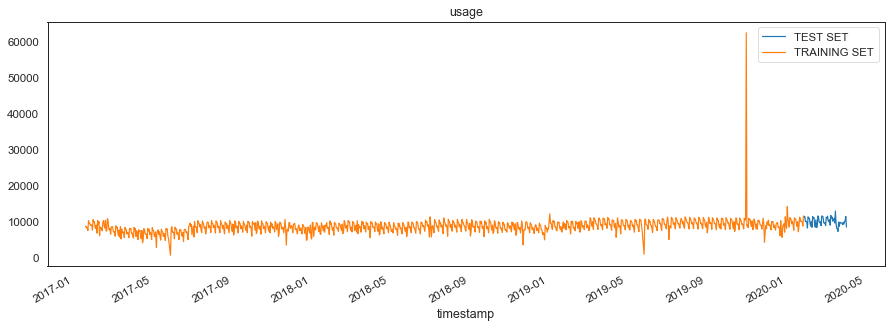

In [8]:
_ = data_test \
    .rename(columns={'usage': 'TEST SET'}) \
    .join(data_train.rename(columns={'usage': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='usage', style='-')

# There is an anomaly on the maximum data
so lets change it with the mean of the data

In [9]:
mymap = {62272:8694.44}
df=df.applymap(lambda s: mymap.get(s) if s in mymap else s)

In [10]:
df.describe()

,usage
count,1165.000000
mean,8648.457888
std,1468.854955
min,624.000000
25%,7774.000000
50%,8703.000000
75%,9725.000000
max,14079.000000


In [11]:
split_date = '29-Jan-2020'
data_train = df.loc[df.index <= split_date].copy()
data_test = df.loc[df.index > split_date].copy()

In [12]:
# Data preprocess
training_set = data_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

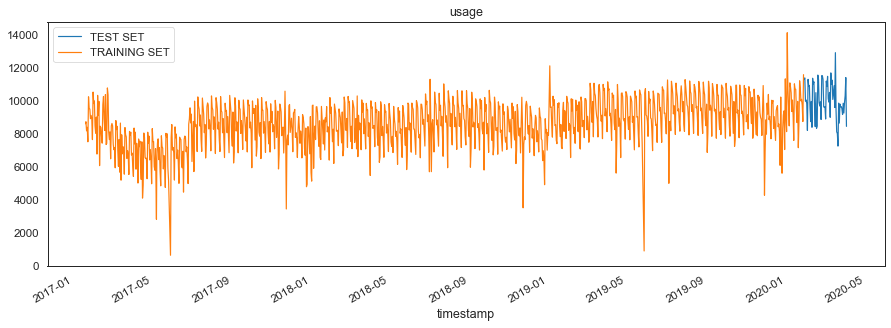

In [13]:
_ = data_test \
    .rename(columns={'usage': 'TEST SET'}) \
    .join(data_train.rename(columns={'usage': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='usage', style='-')

Looks pretty good

In [14]:
#LSTM Model
model = Sequential()
model.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
model.fit(X_train, y_train, epochs=50, batch_size=7, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1098 samples
Epoch 1/50
1098/1098 - 3s - loss: 0.0183
Epoch 2/50
1098/1098 - 1s - loss: 0.0116
Epoch 3/50
1098/1098 - 1s - loss: 0.0118
Epoch 4/50
1098/1098 - 1s - loss: 0.0117
Epoch 5/50
1098/1098 - 1s - loss: 0.0115
Epoch 6/50
1098/1098 - 1s - loss: 0.0116
Epoch 7/50
1098/1098 - 1s - loss: 0.0110
Epoch 8/50
1098/1098 - 1s - loss: 0.0112
Epoch 9/50
1098/1098 - 1s - loss: 0.0111
Epoch 10/50
1098/1098 - 1s - loss: 0.0111
Epoch 11/50
1098/1098 - 1s - loss: 0.0111
Epoch 12/50
1098/1098 - 1s - loss: 0.0110
Epoch 13/50
1098/1098 - 1s - loss: 0.0111
Epoch 14/50
1098/1098 - 1s - loss: 0.0110
Epoch 15/50
1098/1098 - 1s - loss: 0.0109
Epoch 16/50
1098/1098 - 1s - loss: 0.0113
Epoch 17/50
1098/1098 - 1s - loss: 0.0108
Epoch 18/50
1098/1098 - 1s - loss: 0.0110
Epoch 19/50
1098/1098 - 1s - loss: 0.0110
Epoch 20/50
1098/1098 - 1s - loss: 0.0111
Epoch 21/50
1098/1098 - 1s - loss: 0.0109
Epoch 22/50

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Making the predictions
test_set = data_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_dau = model.predict(inputs)
predicted_dau = sc.inverse_transform(predicted_dau)

In [18]:
data_test['Prediction'] = predicted_dau
data_all = pd.concat([data_test, data_train], sort=False)

In [19]:
#saving the predicted values in a common data frame for future comparision
final_data = data_all
final_data = final_data.reset_index()
final_data = final_data.rename(columns={'Prediction': 'lstm'})
final_data = final_data[['timestamp','usage','lstm']]

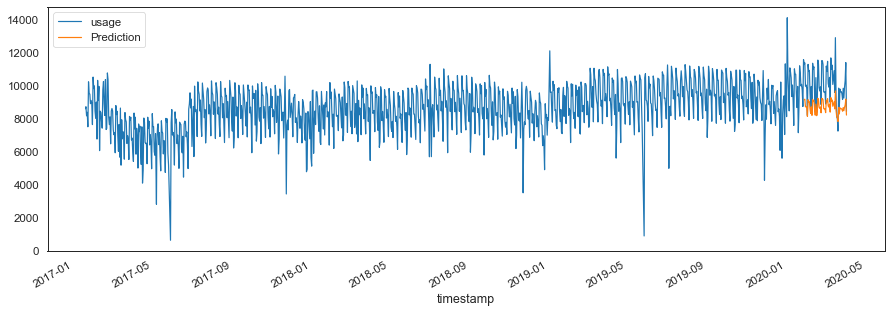

In [20]:
_ = data_all[['usage','Prediction']].plot(figsize=(15, 5))

In [85]:
mean_absolute_percentage_error(y_true=data_test['usage'],
                   y_pred=data_test['Prediction'])

10.349158607773221